About - Dataset:

The dataset provided for this project is focused on heart failure, a critical medical condition characterized by
the heart's inability to pump blood effectively, leading to inadequate circulation throughout the body. Here's an
overview of the dataset:

Title: Heart Failure Clinical Records Dataset

Source: The dataset was collected at the Faisalabad Institute of Cardiology and the Allied Hospital in
Faisalabad, Punjab, Pakistan, during the period of April to December in 2015. It was later made available on
Kaggle.


Description: The dataset comprises medical records of 299 patients diagnosed with heart failure. These records
include various clinical, body, and lifestyle information of the patients. The dataset encompasses 13 features,
providing insights into the patients' health status and potential risk factors for heart failure.

Features:

Age: The age of the patient (numeric).

Anaemia: Indicates the presence of anemia (binary: 0 for no, 1 for yes).

Creatinine Phosphokinase (CPK): Level of creatinine phosphokinase enzyme in the blood (numeric).

Diabetes: Indicates whether the patient has diabetes (binary: 0 for no, 1 for yes).

Ejection Fraction: Percentage of blood leaving the heart at each contraction (numeric).

High Blood Pressure: Indicates whether the patient has high blood pressure (binary: 0 for no, 1 for yes).

Platelets: Platelet count in the blood (numeric).

Serum Creatinine: Level of creatinine in the blood (numeric).

Serum Sodium: Level of sodium in the blood (numeric).

Sex: Gender of the patient (binary: 0 for female, 1 for male).

Smoking: Indicates whether the patient smokes (binary: 0 for no, 1 for yes).

Time: Follow-up period (in days) for the patient's condition (numeric).

Death Event:

Indicates whether the patient died during the follow-up period (binary: 0 for no, 1 for yes).


Question: 1. What is the distribution of age among heart failure patients in the dataset?

In [11]:
#Answer 1

In [42]:
import pandas as pd

In [44]:
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [53]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


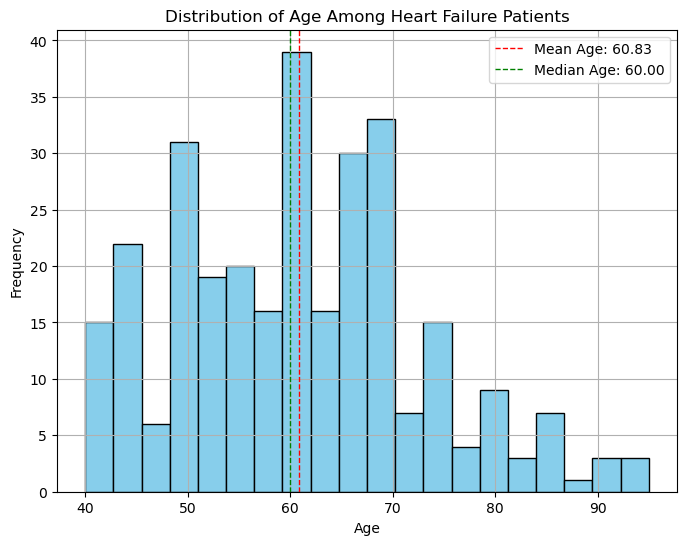

Mean Age: 60.83
Median Age: 60.00


In [55]:
# Extract the 'Age' column
ages = df['age']

# Calculate statistical measures
mean_age = ages.mean()
median_age = ages.median()

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.hist(ages, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age Among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label=f'Mean Age: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=1, label=f'Median Age: {median_age:.2f}')
plt.legend()
plt.grid(True)
plt.show()

# Print statistical measures
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")


Question: 2. How does the death rate vary with age?

In [58]:
#Answer

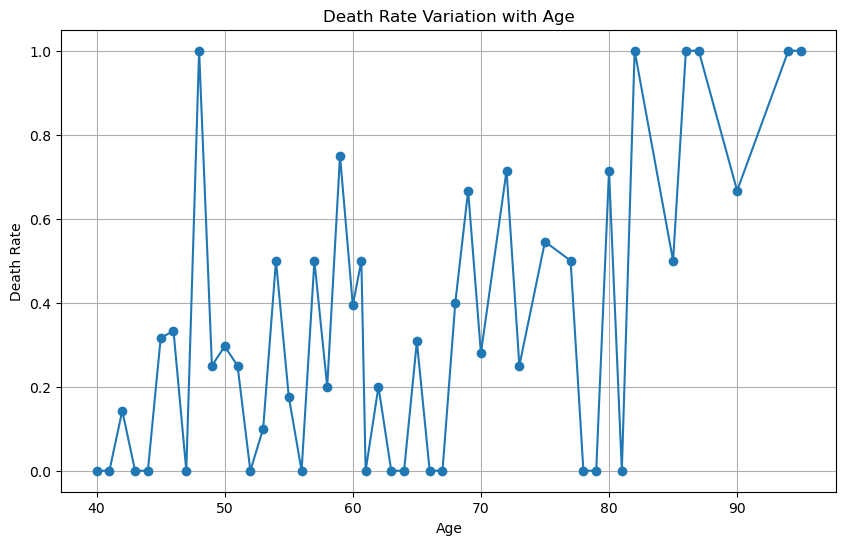

In [64]:
# Group data by age and calculate death rate for each age group
age_death_rate = df.groupby('age')['DEATH_EVENT'].mean()

# Plot the relationship between age and death rate
plt.figure(figsize=(10, 6))
plt.plot(age_death_rate.index, age_death_rate.values, marker='o', linestyle='-')
plt.title('Death Rate Variation with Age')
plt.xlabel('Age')
plt.ylabel('Death Rate')
plt.grid(True)
plt.show()

Question: 2. What is the percentage of male and female patients in the dataset?

In [67]:
#Answer

In [71]:
df['sex']

0      1
1      1
2      1
3      1
4      0
      ..
294    1
295    0
296    0
297    1
298    1
Name: sex, Length: 299, dtype: int64

In [77]:
# Count the number of male and female patients
male_count = df[df['sex'] == 1]['sex'].count()
female_count = df[df['sex'] == 0]['sex'].count()

# Calculate the total number of patients
total_patients = df['sex'].count()

# Calculate the percentage of male and female patients
male_percentage = (male_count / total_patients) * 100
female_percentage = (female_count / total_patients) * 100

print(f"Percentage of male patients: {male_percentage:.2f}%")
print(f"Percentage of female patients: {female_percentage:.2f}%")

Percentage of male patients: 64.88%
Percentage of female patients: 35.12%


Question: 4.How does the platelet count vary among different age groups?

In [88]:
#Answer

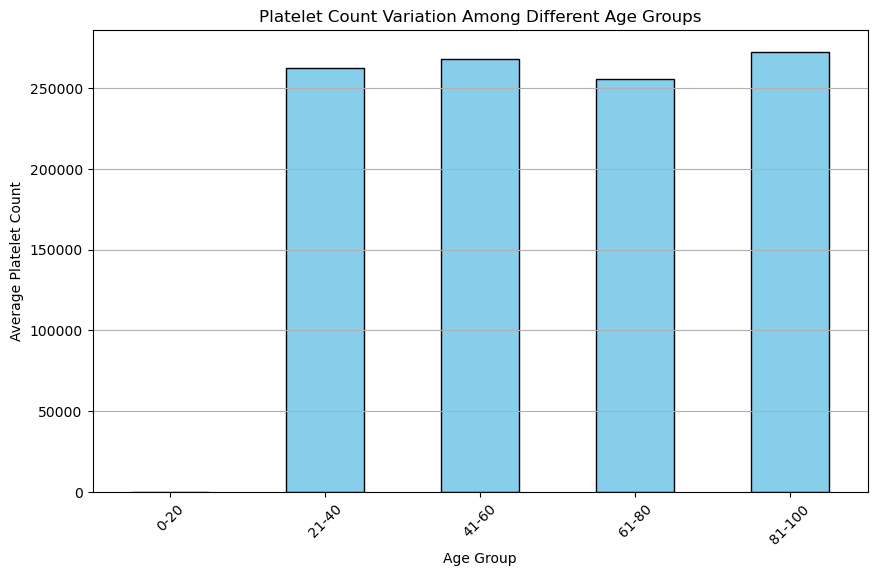

In [86]:
# Define age groups
age_bins = [0, 20, 40, 60, 80, 100]  
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

df['age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)


platelet_age_group = df.groupby('age Group')['platelets'].mean()


plt.figure(figsize=(10, 6))
platelet_age_group.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Platelet Count Variation Among Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Platelet Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Question: 5.Is there a correlation between creatinine and sodium levels in the blood?

In [91]:
#Answer

In [95]:
correlation = df['serum_creatinine'].corr(df['serum_sodium'])


print(f"Correlation between creatinine and sodium levels: {correlation:.2f}")

Correlation between creatinine and sodium levels: -0.19


Question: 6.How does the prevalence of high blood pressure differ between male and female patients?

In [98]:
#Answer

In [100]:
total_male = df[df['sex'] == 1]['sex'].count()
total_female = df[df['sex'] == 0]['sex'].count()

male_hbp_percentage = (df[(df['sex'] == 1) & (df['high_blood_pressure'] == 1)]['sex'].count() / total_male) * 100
female_hbp_percentage = (df[(df['sex'] == 0) & (df['high_blood_pressure'] == 1)]['sex'].count() / total_female) * 100


print(f"Prevalence of high blood pressure among male patients: {male_hbp_percentage:.2f}%")
print(f"Prevalence of high blood pressure among female patients: {female_hbp_percentage:.2f}%")

Prevalence of high blood pressure among male patients: 31.44%
Prevalence of high blood pressure among female patients: 41.90%


Question: 7.What is the relationship between smoking habits and the occurrence of heart failure?

In [103]:
#Answer

In [109]:
heart_failure_smokers_percentage = (df[(df['smoking'] == 1) & (df['DEATH_EVENT'] == 1)]['smoking'].count() / df[df['DEATH_EVENT'] == 1]['DEATH_EVENT'].count()) * 100


no_heart_failure_smokers_percentage = (df[(df['smoking'] == 1) & (df['DEATH_EVENT'] == 0)]['smoking'].count() / df[df['DEATH_EVENT'] == 0]['DEATH_EVENT'].count()) * 100


print(f"Percentage of smokers among patients who experienced heart failure: {heart_failure_smokers_percentage:.2f}%")
print(f"Percentage of smokers among patients who did not experience heart failure: {no_heart_failure_smokers_percentage:.2f}%")


Percentage of smokers among patients who experienced heart failure: 31.25%
Percentage of smokers among patients who did not experience heart failure: 32.51%


Question: 8.Are there any noticeable patterns in the distribution of death events across different age groups?

In [114]:
#Answer

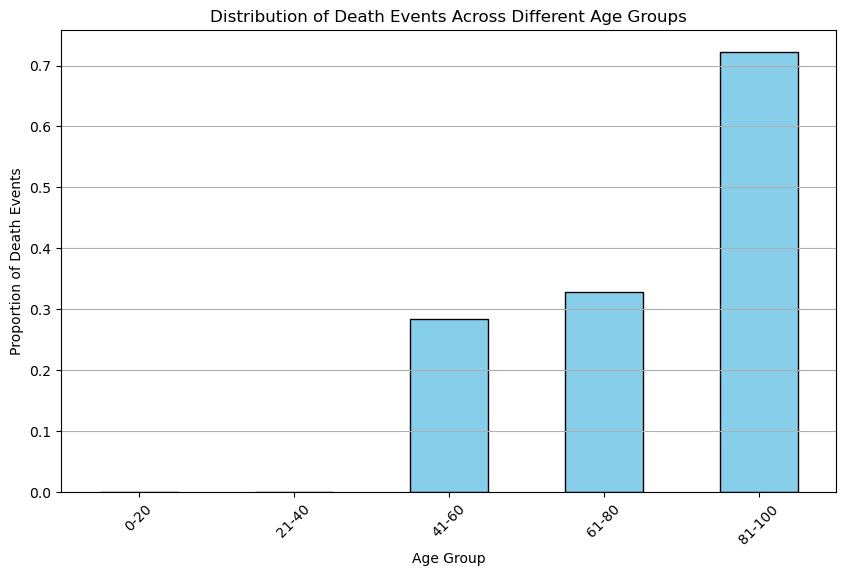

In [116]:
age_bins = [0, 20, 40, 60, 80, 100]  
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']  


df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)


death_event_proportion = df.groupby('Age Group')['DEATH_EVENT'].mean()


plt.figure(figsize=(10, 6))
death_event_proportion.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Death Events Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Death Events')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Question: 9.Is there any significant difference in ejection fraction between patients with and without diabetes?

In [119]:
#Answer

In [125]:
from scipy.stats import ttest_ind

In [126]:
ejection_fraction_diabetes = df[df['diabetes'] == 1]['ejection_fraction']
ejection_fraction_no_diabetes = df[df['diabetes'] == 0]['ejection_fraction']

t_statistic, p_value = ttest_ind(ejection_fraction_diabetes, ejection_fraction_no_diabetes)


alpha = 0.05


if p_value < alpha:
    print("There is a significant difference in ejection fraction between patients with and without diabetes.")
else:
    print("There is no significant difference in ejection fraction between patients with and without diabetes.")


There is no significant difference in ejection fraction between patients with and without diabetes.


Question: 10. How does the serum creatinine level vary between patients who survived and those who did not?

In [130]:
#Answer

In [132]:
import matplotlib.pyplot as plt

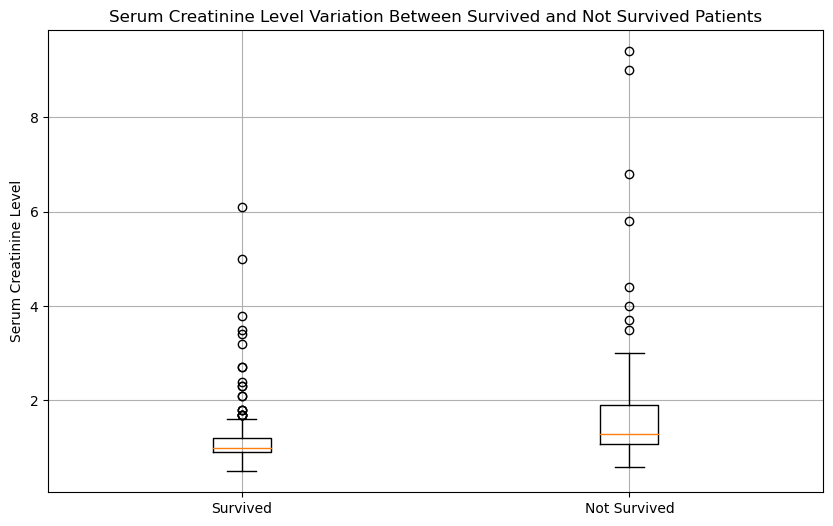

Summary Statistics:
Mean Serum Creatinine (Survived): 1.18
Mean Serum Creatinine (Not Survived): 1.84
Median Serum Creatinine (Survived): 1.00
Median Serum Creatinine (Not Survived): 1.30


In [134]:
serum_creatinine_survived = df[df['DEATH_EVENT'] == 0]['serum_creatinine']
serum_creatinine_not_survived = df[df['DEATH_EVENT'] == 1]['serum_creatinine']


mean_serum_creatinine_survived = serum_creatinine_survived.mean()
mean_serum_creatinine_not_survived = serum_creatinine_not_survived.mean()

median_serum_creatinine_survived = serum_creatinine_survived.median()
median_serum_creatinine_not_survived = serum_creatinine_not_survived.median()


plt.figure(figsize=(10, 6))
plt.boxplot([serum_creatinine_survived, serum_creatinine_not_survived], labels=['Survived', 'Not Survived'])
plt.title('Serum Creatinine Level Variation Between Survived and Not Survived Patients')
plt.ylabel('Serum Creatinine Level')
plt.grid(True)
plt.show()


print("Summary Statistics:")
print(f"Mean Serum Creatinine (Survived): {mean_serum_creatinine_survived:.2f}")
print(f"Mean Serum Creatinine (Not Survived): {mean_serum_creatinine_not_survived:.2f}")
print(f"Median Serum Creatinine (Survived): {median_serum_creatinine_survived:.2f}")
print(f"Median Serum Creatinine (Not Survived): {median_serum_creatinine_not_survived:.2f}")